In [17]:
# !pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE
from scipy.special import factorial

PCA: reduce the dimensionality while preserving the variance (information) as much as possible

Load data

In [18]:
data = np.loadtxt("pca_data.txt")
print("(row,col):", data.shape)

(row,col): (1000, 500)


Standardize the data

In [19]:
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
standardized_data = (data_mean - data) / data_std

Covariance matrix

In [ ]:
# variables are in columns, not rows
cov_matrix = np.cov(standardized_data, rowvar=False)

Eigenvalues and Eigenvectors

In [ ]:
# large eigenvalues means greater variance in the direction of its eigenvector
# eigenvalues is sorted in ascending order
# eigenvector: direction of the principal component
# eigenvalues: the amount of variance by that principal component
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# sort in descending order, return the indices of the sorted elements
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
# sort the columns according to sorted indices
sorted_eigenvectors = eigenvectors[:, sorted_indices]

top_2_eigenvectors = sorted_eigenvectors[:, :2]

Project data onto the principal components

In [ ]:
# computes the 2D projection of the standardized data onto the top 2 principal components
pca_2d_projection = standardized_data.dot(top_2_eigenvectors)

2D scatter plot

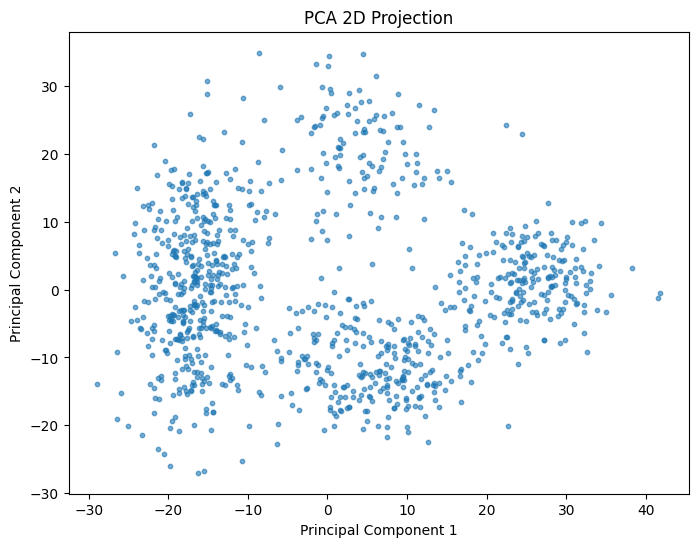

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_projection[:, 0], pca_2d_projection[:, 1], s=10, alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection")
plt.show()

UMAP plot

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


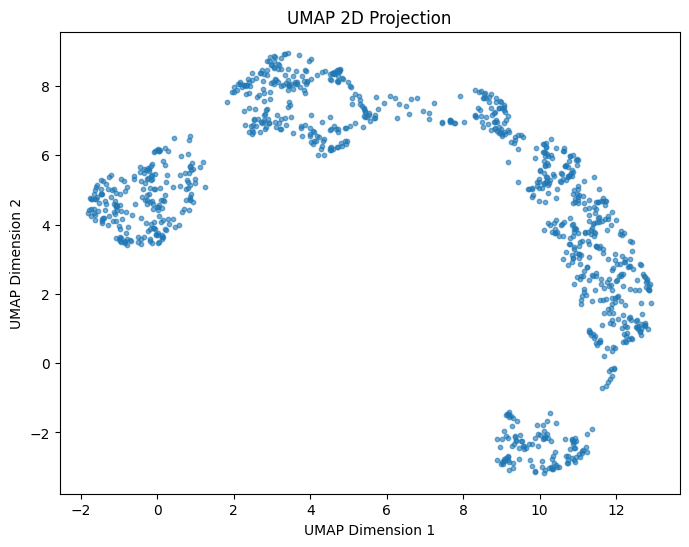

In [ ]:
# umap: dimensionality reduction technique, tries to preseve the structure of the data as much as possible
# like clusteing and nearest neighbour
# target number of dimensions=2
# flips if mean-data becomes data-mean
umap_2d = umap.UMAP(n_components=2, random_state=42)
# work with STA standardized data, for equal contribution of all feature, fitures with bigger scales don't get any advantages
umap_projection = umap_2d.fit_transform(standardized_data)

plt.figure(figsize=(8, 6))
# size of the points, s=10
# alpha=transparency, 0 means fully transparent, 1 means solid
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], s=10, alpha=0.6)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP 2D Projection")
plt.show()



t-SNE plot

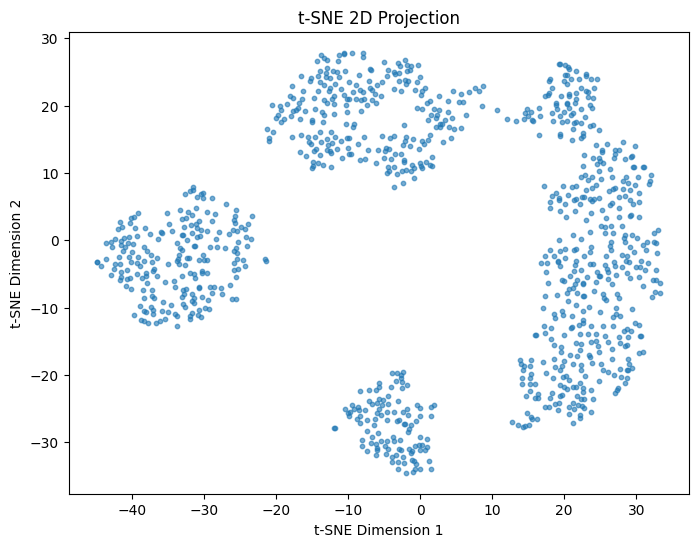

In [ ]:
# focuses on preserving local structures (similarity between close points) in the data
tsne = TSNE(n_components=2, random_state=42)
tsne_projection = tsne.fit_transform(standardized_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_projection[:, 0], tsne_projection[:, 1], s=10, alpha=0.6)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE 2D Projection")
plt.show()

EM

Load data

In [26]:
data = np.loadtxt("em_data.txt")

Initialize parameters

In [ ]:
np.random.seed(0)
# mean of component 1 and 2
lambda1, lambda2 = np.random.rand(2)
# Fraction of total responsibility belonging to component 1 and 2
p1, p2 = 0.5, 0.5

threshold = 1e-6
max_iter = 100
n = len(data)

EM step

In [ ]:
for iteration in range(max_iter):
    # E-step: calculate responsibilities
    # prior probability times probability mass function
    poisson1 = p1 * (np.exp(-lambda1) * (lambda1 ** data) / factorial(data))
    poisson2 = p2 * (np.exp(-lambda2) * (lambda2 ** data) / factorial(data))
    # gamma1 indicates the probability that each data point belongs to the first distribution
    gamma1 = poisson1 / (poisson1 + poisson2)
    gamma2 = 1 - gamma1

    # M-step: update lambda and p values
    lambda1_new = np.sum(gamma1 * data) / np.sum(gamma1)
    lambda2_new = np.sum(gamma2 * data) / np.sum(gamma2)
    p1_new = np.sum(gamma1) / n
    p2_new = 1 - p1_new  
    if (abs(lambda1 - lambda1_new) < threshold and
        abs(lambda2 - lambda2_new) < threshold and
        abs(p1 - p1_new) < threshold):
        print(f"Converged after {iteration} iterations")
        break

    # Update parameters for the next iteration
    lambda1, lambda2 = lambda1_new, lambda2_new
    p1, p2 = p1_new, p2_new

Final estimates

In [29]:
print("Estimated Parameters:")
print(f"Mean number of children in families with planning: {lambda1}")
print(f"Mean number of children in families without planning: {lambda2}")
print(f"Proportion of families with planning: {p1}")
print(f"Proportion of families without planning: {p2}")

Estimated Parameters:
Mean number of children in families with planning: 1.7825256145266222
Mean number of children in families without planning: 4.910818739390895
Proportion of families with planning: 0.35604679450849747
Proportion of families without planning: 0.6439532054915025
